In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [44]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [45]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [46]:
data = pd.DataFrame(housing.data, columns = housing.feature_names)
dataset = pd.DataFrame(np.c_[data['MedInc'], data['HouseAge'], data['Population']], columns = ['MedInc', 'HouseAge', 'Population'])

In [47]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [48]:
dataset

,MedInc,HouseAge,Population
0,8.3252,41.0,322.0
1,8.3014,21.0,2401.0
2,7.2574,52.0,496.0
3,5.6431,52.0,558.0
4,3.8462,52.0,565.0
...,...,...,...
20635,1.5603,25.0,845.0
20636,2.5568,18.0,356.0
20637,1.7000,17.0,1007.0
20638,1.8672,18.0,741.0


In [49]:
#training dataset
X = dataset[:-100]
Y = housing.target[:-100]
#testing dataset
X_test = dataset[-100:]
Y_test = housing.target[-100:]


In [50]:
u = np.mean(dataset, axis = 0)
std = np.std(dataset, axis = 0)

In [51]:
#trainig ko normalize
X = (X - u)/std
#testing ko normalize
X_test = (X_test - u)/std

In [52]:
#convert it into numpy array
X = np.array(X)
Y = np.array(Y)

In [53]:
X[:5,:]

array([[ 2.34476576,  0.98214266, -0.9744286 ],
       [ 2.33223796, -0.60701891,  0.86143887],
       [ 1.7826994 ,  1.85618152, -0.82077735],
       [ 0.93296751,  1.85618152, -0.76602806],
       [-0.012881  ,  1.85618152, -0.75984669]])

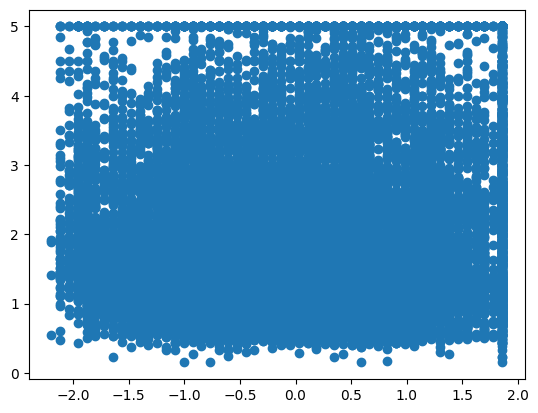

In [54]:
plt.scatter(X[:,1], Y)
plt.show()

# SINCE X[0] = 1 SO WE NEED TO STACK A COLUMN OF 1 IN X DATASET

In [55]:
one = np.ones((X.shape[0], 1))

In [56]:
X = np.hstack((one, X))

In [57]:
X

array([[ 1.        ,  2.34476576,  0.98214266, -0.9744286 ],
       [ 1.        ,  2.33223796, -0.60701891,  0.86143887],
       [ 1.        ,  1.7826994 ,  1.85618152, -0.82077735],
       ...,
       [ 1.        , -1.47773814, -0.84539315, -0.79870102],
       [ 1.        , -0.53125798,  0.10810379,  0.17442353],
       [ 1.        ,  0.1837738 , -0.68647699,  2.3361376 ]])

In [60]:
print(X[:5, :])
print(X.shape)

[[ 1.          2.34476576  0.98214266 -0.9744286 ]
 [ 1.          2.33223796 -0.60701891  0.86143887]
 [ 1.          1.7826994   1.85618152 -0.82077735]
 [ 1.          0.93296751  1.85618152 -0.76602806]
 [ 1.         -0.012881    1.85618152 -0.75984669]]
(20540, 4)


In [63]:
#X[0].shape = first row or iski shape btari hai usme kitne columns hai (4,0) toh mtlb 4 columns hai isliye n = X.shape[0] lete hai
print(X[0].shape)

(4,)


# NOW APPLY LINEAR REGRESSION 

In [102]:
def hypothesis(X,theta):
    y_ = 0
    n = X.shape[0]
    for i in range(n):
        y_ = theta[i]*X[i]
    return y_    

In [116]:
def cost(X,theta):
    m = X.shape[0]         #no of rows and there is only one element in it only
    
    total_loss = 0
    for i in range(m):
        y_p = hypothesis(X[i],theta)   #X[i] is a row contianing only one element
        
        y_gt = Y[i]
        
        total_loss += (y_p - y_gt)**2
        
    return total_loss/m   

In [117]:
def gradient(X,Y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            y_p = hypothesis(X[i], theta)
            y_gt = Y[i]
            
            grad[j] += (y_p - y_gt)*X[i][j]
    return grad/m
        
        

In [118]:
def gradient_descent(X,Y, learning_rate = 0.003, epochs = 100):
    m, n = X.shape
    theta = np.zeros((n,))
    cost_epoch = []
    for i in range(epochs):
        loss = cost(X,theta)
        grad = gradient(X,Y,theta)
        cost_epoch.append(loss)
        
        for j in range(n):
             theta[j] = theta[j] - learning_rate*grad[j]
                
        return theta , cost_epoch       

In [119]:
theta , cost_epoch = gradient_descent(X, Y, learning_rate = 0.1, epochs = 1000)

In [120]:
theta

array([ 0.20734098,  0.08001738,  0.01241769, -0.00286706])

In [121]:
cost_epoch

[5.630931285204433]

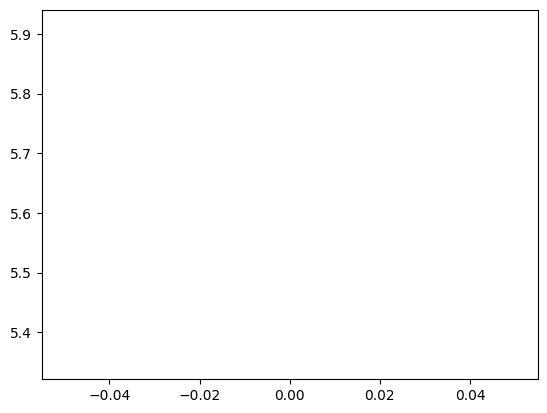

In [129]:
plt.plot(cost_epoch, color = 'green')

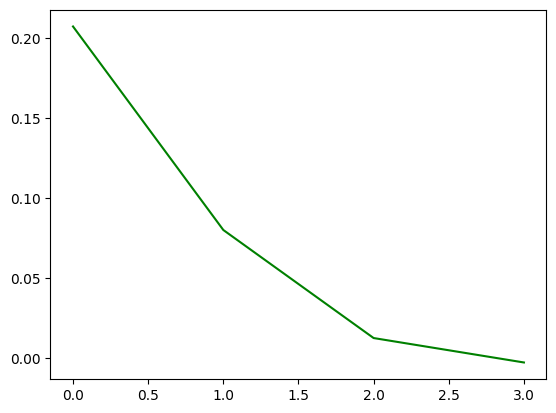

In [122]:
plt.plot(theta, color = 'green')

In [111]:
def R2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    score = (1-num/den)
    return score

In [125]:
X_test.shape

(100, 3)